In [383]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ast

In [384]:
samples_abs_df = pd.read_csv('YM2_dataset_full.csv')

samples_abs_df['abs_avg'] = samples_abs_df['abs_avg'].apply(ast.literal_eval)
samples_abs_df['abs_std'] = samples_abs_df['abs_std'].apply(ast.literal_eval)
samples_abs_df['abs_avg_2mic'] = samples_abs_df['abs_avg_2mic'].apply(ast.literal_eval)
samples_abs_df['abs_std_2mic'] = samples_abs_df['abs_std_2mic'].apply(ast.literal_eval)
samples_abs_df['freq'] = samples_abs_df['freq'].apply(ast.literal_eval)
samples_abs_df['freq_2mic'] = samples_abs_df['freq_2mic'].apply(ast.literal_eval)
samples_abs_df['tl_avg'] = samples_abs_df['tl_avg'].apply(ast.literal_eval)
samples_abs_df['tl_std'] = samples_abs_df['tl_std'].apply(ast.literal_eval)
samples_abs_df['real_k'] = samples_abs_df['real_k'].apply(ast.literal_eval)
samples_abs_df['imag_k'] = samples_abs_df['imag_k'].apply(ast.literal_eval)
samples_abs_df['real_z'] = samples_abs_df['real_z'].apply(ast.literal_eval)
samples_abs_df['imag_z'] = samples_abs_df['imag_z'].apply(ast.literal_eval)
samples_abs_df['real_z_2mic'] = samples_abs_df['real_z_2mic'].apply(ast.literal_eval)
samples_abs_df['imag_z_2mic'] = samples_abs_df['imag_z_2mic'].apply(ast.literal_eval)
samples_abs_df['real_rho'] = samples_abs_df['real_rho'].apply(ast.literal_eval)
samples_abs_df['imag_rho'] = samples_abs_df['imag_rho'].apply(ast.literal_eval)
samples_abs_df['real_K'] = samples_abs_df['real_K'].apply(ast.literal_eval)
samples_abs_df['imag_K'] = samples_abs_df['imag_K'].apply(ast.literal_eval)
samples_abs_df['real_c'] = samples_abs_df['real_c'].apply(ast.literal_eval)
samples_abs_df['imag_c'] = samples_abs_df['imag_c'].apply(ast.literal_eval)

samples_abs_df = samples_abs_df.set_index('sample')

samples_abs_df.index


Index(['YM2_coarse_d1', 'YM2_coarse_d2', 'YM2_coarse_d3', 'YM2_coarse_loose',
       'YM2_extrafine_d1', 'YM2_extrafine_d2', 'YM2_extrafine_d3',
       'YM2_extrafine_loose', 'YM2_fine_d1', 'YM2_fine_d2', 'YM2_fine_d3',
       'YM2_fine_loose', 'YM2_medium_d1', 'YM2_medium_d2', 'YM2_medium_d3',
       'YM2_medium_loose'],
      dtype='object', name='sample')

In [385]:
selected_sample = samples_abs_df.loc['YM2_coarse_d1']	

# Measurement with no gap:
zreal_2mic = selected_sample['real_z_2mic']
zimag_2mic = selected_sample['imag_z_2mic']
z_array= [complex(r, i) for r, i in zip(zreal_2mic, zimag_2mic)]  
z_complex = np.array(z_array, dtype=np.complex128)

# Measurement with 57 mm gap:
z_2mic_57mmgap = pd.read_csv('YM2_coarse_d1_s1_twogaps\YM2_coarse_d1_s1_57mmgapcharImp.txt', delimiter='\t', names=['freq','impedance'])
z_2mic_57mmgap['freq'] = z_2mic_57mmgap['freq'].str.split('+').apply(lambda x: x[0])
z_2mic_57mmgap['impedance'] = z_2mic_57mmgap['impedance'].str.replace('i', 'j', regex=False).apply(complex)

abs_2mic_57mmgap = pd.read_csv('YM2_coarse_d1_s1_twogaps\YM2_coarse_d1_s1_57mmgapabsCoef.txt', delimiter='\t', names=['freq','abs'])

# Measurement with 157 mm gap:
z_2mic_157mmgap = pd.read_csv('YM2_coarse_d1_s1_twogaps\YM2_coarse_d1_s1_157mmgapcharImp.txt', delimiter='\t', names=['freq','impedance'])
z_2mic_157mmgap['freq'] = z_2mic_157mmgap['freq'].str.split('+').apply(lambda x: x[0])
z_2mic_157mmgap['impedance'] = z_2mic_157mmgap['impedance'].str.replace('i', 'j', regex=False).apply(complex)

abs_2mic_157mmgap = pd.read_csv('YM2_coarse_d1_s1_twogaps\YM2_coarse_d1_s1_157mmgapabsCoef.txt', delimiter='\t', names=['freq','abs'])



<>:10: SyntaxWarning: invalid escape sequence '\Y'
<>:14: SyntaxWarning: invalid escape sequence '\Y'
<>:17: SyntaxWarning: invalid escape sequence '\Y'
<>:21: SyntaxWarning: invalid escape sequence '\Y'
<>:10: SyntaxWarning: invalid escape sequence '\Y'
<>:14: SyntaxWarning: invalid escape sequence '\Y'
<>:17: SyntaxWarning: invalid escape sequence '\Y'
<>:21: SyntaxWarning: invalid escape sequence '\Y'
C:\Users\J.Garcia\AppData\Local\Temp\ipykernel_30176\2855263711.py:10: SyntaxWarning: invalid escape sequence '\Y'
  z_2mic_57mmgap = pd.read_csv('YM2_coarse_d1_s1_twogaps\YM2_coarse_d1_s1_57mmgapcharImp.txt', delimiter='\t', names=['freq','impedance'])
C:\Users\J.Garcia\AppData\Local\Temp\ipykernel_30176\2855263711.py:14: SyntaxWarning: invalid escape sequence '\Y'
  abs_2mic_57mmgap = pd.read_csv('YM2_coarse_d1_s1_twogaps\YM2_coarse_d1_s1_57mmgapabsCoef.txt', delimiter='\t', names=['freq','abs'])
C:\Users\J.Garcia\AppData\Local\Temp\ipykernel_30176\2855263711.py:17: SyntaxWarning: in

In [386]:

abs_2mic_57mmgap['abs']

0       0.093131
1       0.087735
2       0.084221
3       0.092018
4       0.088837
          ...   
4348    0.613186
4349    0.611930
4350    0.611393
4351    0.610587
4352    0.609938
Name: abs, Length: 4353, dtype: float64

C:\Users\J.Garcia\AppData\Roaming\Python\Python312\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\J.Garcia\AppData\Roaming\Python\Python312\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


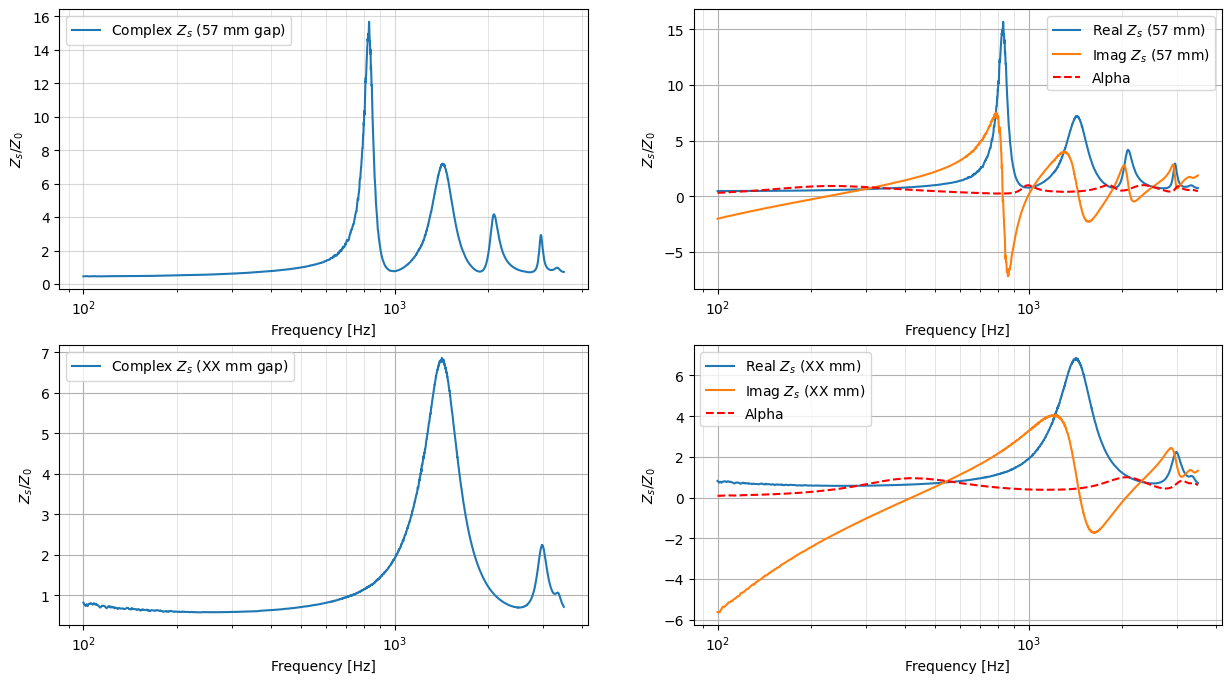

In [387]:
fig, ax = plt.subplots(2, 2, figsize=(15, 8), )
ax = ax.flatten()

freq_array = np.array(selected_sample['freq'], dtype=np.float64)

z_nogap = z_2mic_57mmgap['impedance'].values
#z_nogap = z_complex
z_gap = z_2mic_157mmgap['impedance'].values

abs_nogap = abs_2mic_57mmgap['abs'].values
abs_gap = abs_2mic_157mmgap['abs'].values


ax[0].semilogx(freq_array, z_gap, label='Complex $Z_s$ (57 mm gap)')
#ax[0].semilogx(freq_array, abs_gap, label='Alpha')
ax[0].set_ylabel('$Z_s/Z_0$')
ax[0].set_xlabel('Frequency [Hz]')
ax[0].grid(alpha=0.5)
ax[0].grid(which='minor', linestyle='-', linewidth='0.5', color='gray', alpha= 0.3)
ax[0].legend()

ax[1].semilogx(freq_array, z_gap.real, label='Real $Z_s$ (57 mm)')
ax[1].semilogx(freq_array, z_gap.imag, label='Imag $Z_s$ (57 mm)')
ax[1].semilogx(freq_array, abs_gap, label='Alpha', color='r', linestyle='--')
ax[1].set_ylabel('$Z_s/Z_0$')
ax[1].set_xlabel('Frequency [Hz]')
ax[1].grid()
ax[1].grid(which='minor', linestyle='-', linewidth='0.5', color='gray', alpha= 0.3)
ax[1].legend()


ax[2].semilogx(freq_array, z_nogap, label='Complex $Z_s$ (XX mm gap)')
#ax[2].semilogx(freq_array, abs_nogap, label='Alpha')
ax[2].set_ylabel('$Z_s/Z_0$')
ax[2].set_xlabel('Frequency [Hz]')
ax[2].grid()
ax[2].grid(which='minor', linestyle='-', linewidth='0.5', color='gray', alpha= 0.3)
ax[2].legend()

ax[3].semilogx(freq_array, z_nogap.real, label='Real $Z_s$ (XX mm)')
ax[3].semilogx(freq_array, z_nogap.imag, label='Imag $Z_s$ (XX mm)')
ax[3].semilogx(freq_array, abs_nogap, label='Alpha', color='r', linestyle='--')
ax[3].set_ylabel('$Z_s/Z_0$')
ax[3].set_xlabel('Frequency [Hz]')
ax[3].grid()
#ax[3].set_ylim([-2, 2.5])
ax[3].grid(which='minor', linestyle='-', linewidth='0.5', color='gray', alpha= 0.3)
ax[3].legend()


plt.show()


### Utsuno method 

Two microphones measurement with hard backing-end and two air gap conditions ($L$, $L'$) between the sample and the back-end. $Z_0$ and $Z'_0$ are measured respectively. 

$Z_c$  $\rightarrow$ Characteristic impedance of the material  \
$Z_1$  $\rightarrow$ Acoustic impedance behind the porous material, for condition airgap 1               \
${Z'}_1$  $\rightarrow$   Acoustic impedance behind the porous material, for condition airgap 2         \
$Z_0$  $\rightarrow$     Acoustic impedance measured at the sample surface for condition 1 (surface impedance)       \
$Z'_0$  $\rightarrow$       Acoustic impedance measured at the sample surface for condition 2 (surface impedance)      


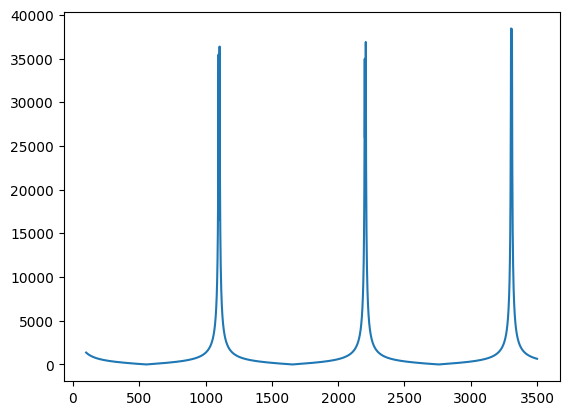

In [400]:
# Enviromental properties
temp = 25
p0 = 99000
tK = temp + 273.15
c0 = 20.047 * np.sqrt( tK )     # m/s
rho0 = 1.290 * (p0 / 101325) * (273.15 / tK)     # kg/m3
z_air = rho0 * c0  # Characteristic impedance of air   

# Measurement variables
d = 43e-3  # Sample thickness [m]
l = 57e-3  # Airgap for condition 1 [m]
l_prima = 157e-3 # Airgap for condition 2 [m]

k = (2*np.pi*freq_array) / c0 # Wavenumber in air

sin_kl = np.sin(k*l)
sin_kl_prima = np.sin(k*l_prima)
# Threshold for near-zero values
threshold = 1e-2
mask1 = np.abs(sin_kl) < threshold
mask2 = np.abs(sin_kl_prima) < threshold

# Calculate cotangent, avoiding division by zero
cot_kl = np.where(mask1, np.cos(k*l)/threshold, np.cos(k*l)/sin_kl)
cot_kl_prima = np.where(mask2, np.cos(k*l)/threshold, np.cos(k*l_prima)/sin_kl_prima)


# Acoustic impedance behind the porous material (hard backing-end)
#z_1 = -1j*z_air * (np.cos(k * l)/np.sin(k * l))  
#z_1_prima = -1j*z_air * (np.cos(k * l_prima)/np.sin(k * l_prima)) 
#z_1 = -1j*z_air / np.tan(k * l)  
#z_1_prima = -1j*z_air / np.tan(k * l_prima) 
z_1 = -1j*z_air * cot_kl  
z_1_prima = -1j*z_air * cot_kl_prima
#z_1 = abs(z_1) * np.exp(1j * np.unwrap(np.angle(z_1), discont=np.pi/80, period=0.001))
#z_1_prima = abs(z_1_prima) * np.exp(1j * np.unwrap(np.angle(z_1_prima), discont=np.pi/80, period=0.001))

z_0 = z_nogap
z_0_prima = z_gap

# Normalized Characteristic impedance of the material
zc = np.sqrt((z_0*z_0_prima*(z_1 - z_1_prima) - z_1*z_1_prima*(z_0 - z_0_prima)) / ((z_1 - z_1_prima) - (z_0 - z_0_prima)))
#zc_phase = np.unwrap(np.angle(zc), discont=np.pi/80, period=0.00001)
#zc = abs(zc) * np.exp(1j * zc_phase)

# Wavenumber of the material
kc = (1/(2*1j*d)) * np.log(((z_0 + zc) / (z_0 - zc)) * ((z_1 - zc) / (z_1 + zc)))
#kc_phase = np.unwrap(np.angle(kc), discont=np.pi/80, period=0.0001)
#kc = abs(kc) * np.exp(1j * kc_phase)


#plt.plot(freq_array, (z_1))
plt.plot(freq_array, abs(z_1_prima))
#plt.ylim([0, 10000])
plt.show()

#z_1_prima

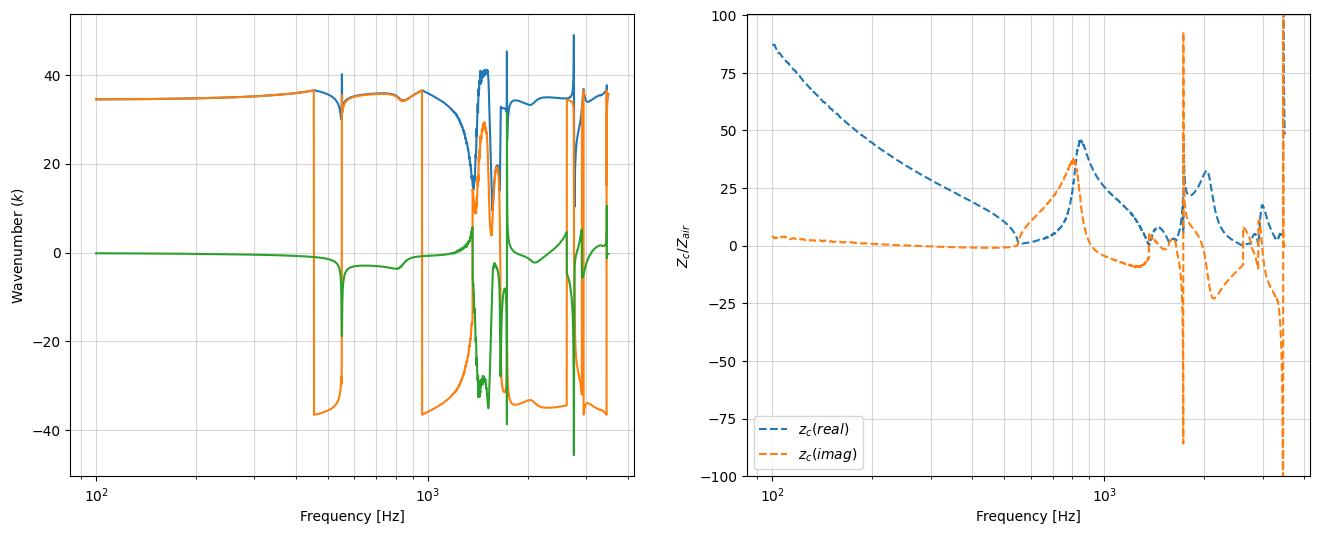

In [406]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax = ax.flatten()

kc_unw = np.unwrap(abs(kc), discont=np.pi/80, period=0.01)* np.exp(1j*np.unwrap(np.angle(kc), discont=np.pi/80, period=0.01))
phase = np.angle(kc)
unw_phase = np.unwrap(phase, discont=np.pi/80, period=0.01)

ax[0].semilogx(freq_array, abs(kc), label = '$k_c$')
ax[0].semilogx(freq_array, kc.real, label = '$k_c$')
ax[0].semilogx(freq_array, kc.imag, label = '$k_c$')
ax[0].set_xlabel('Frequency [Hz]')
ax[0].set_ylabel('Wavenumber ($k$)')
ax[0].grid(which='both', alpha= 0.5)
#ax[0].legend()

kc_unw = np.unwrap(abs(kc), discont=np.pi/80, period=0.01)* np.exp(1j*np.unwrap(np.angle(kc), discont=np.pi/80, period=0.01))
#ax[1].semilogx(freq_array, (zc), label = '$z_c$')
ax[1].semilogx(freq_array, zc.real, linestyle='--',label = '$z_c (real)$')
ax[1].semilogx(freq_array, zc.imag, linestyle='--',label = '$z_c (imag)$')
ax[1].set_xlabel('Frequency [Hz]')
ax[1].set_ylabel('$Z_c/Z_{air}$')
ax[1].set_ylim([-100, 100.5])
ax[1].grid(which='both', alpha= 0.5)
ax[1].legend()
plt.show()